<a href="https://colab.research.google.com/github/KesteHarshada87/MachineLearning/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

csv_path= '/content/drive/MyDrive/MachineLearning/PlayTennis.csv'
df=pd.read_csv(csv_path)


In [26]:
df=df.drop('Day',axis=1,errors='ignore')
df_encoded=df.copy()
df_encoded=pd.get_dummies(df_encoded)
df_encoded=df_encoded.astype(int)
print(df_encoded)


    Windy  Outlook_Overcast  Outlook_Rain  Outlook_Sunny  Temperature_Cool  \
0       0                 0             0              1                 0   
1       1                 0             0              1                 0   
2       0                 1             0              0                 0   
3       0                 0             1              0                 0   
4       0                 0             1              0                 1   
5       1                 0             1              0                 1   
6       1                 1             0              0                 1   
7       0                 0             0              1                 0   
8       0                 0             0              1                 1   
9       0                 0             1              0                 0   
10      1                 0             0              1                 0   
11      1                 1             0              0        

In [32]:
from sklearn.model_selection import train_test_split

X=df_encoded.drop(['PlayTennis_Yes','PlayTennis_No'],axis=1,errors='ignore')
y=df_encoded['PlayTennis_Yes']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)



In [33]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier=DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

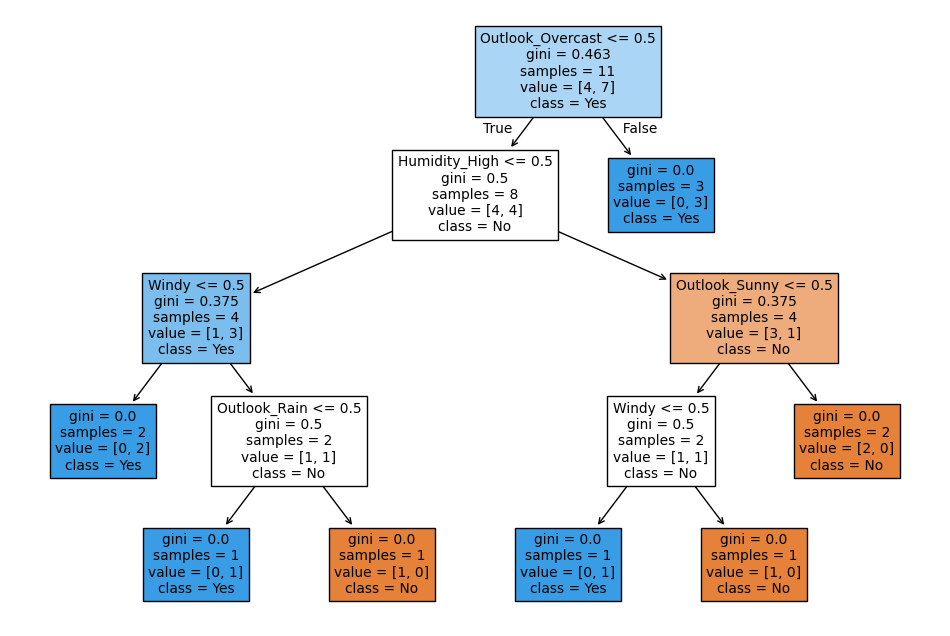

In [35]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(dt_classifier,filled=True,feature_names=X.columns,class_names=['No','Yes'])
plt.show()

In [36]:
from sklearn.tree import DecisionTreeClassifier

dt_pruned=DecisionTreeClassifier(random_state=42,max_depth=3,min_samples_leaf=5)
dt_pruned.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

y_pred_unpruned=dt_classifier.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_pred_unpruned))

y_pred_pruned=dt_pruned.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_pred_pruned))

Accuracy: 1.0
Accuracy: 0.6666666666666666


In [41]:
# For the unpruned tree
import pandas as pd

importances=dt_classifier.feature_importances_

feature_importance_df=pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

feature_importance_df=feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances (Unpruned Tree):")
print(feature_importance_df)


Feature Importances (Unpruned Tree):
            Feature  Importance
0             Windy    0.294643
1  Outlook_Overcast    0.214286
2      Outlook_Rain    0.196429
7     Humidity_High    0.196429
3     Outlook_Sunny    0.098214
4  Temperature_Cool    0.000000
5   Temperature_Hot    0.000000
6  Temperature_Mild    0.000000
8   Humidity_Normal    0.000000
